## *SELF-REFINE: Iterative Refinement with Self-Feedback* Notebook Presentation

#### By David Glukhov and Noé Artru, University of Toronto
#### For CSC2541 (Topics in Machine Learning: Large Models)

This notebook shows a couple examples of how Self-Refine works as a technique to correct an LLM using only itself. By iteratively giving feedback and refining its answers, Self-Refine aims to improve LLMs without any additional training, by better leveraging its expressivity.

To demonstrate Self-Refine, we will first go over a toy example to understand the general principles behind any Self-Refine augmented LLM, before reimplementing one of the use cases from the original paper (acronym generation).

## 1/ Requirements and utility functions

In [ ]:
from IPython.display import HTML, display
import os
from io import StringIO
import pandas as pd
import re
from openai import OpenAI
import matplotlib.pyplot as plt
import random

In [ ]:
# Uncomment this code if you want to use your Google or MistralAI API keys

# !pip install -q -U google-genai
# !pip install mistralai
# from google import genai
# from mistralai import Mistral

# client_gemini = genai.Client(api_key="")

# def get_response_gemini(prompt, model = "gemini-2.0-flash-lite"):
#     response = client_gemini.models.generate_content(model=model, contents=prompt)
#     return response.candidates[0].content.parts[0].text

# client_mistral = Mistral(api_key="")

# def get_response_mistral(prompt, model="mistral-small-latest"):
#     response = client_mistral.chat.complete(model=model, messages = [
#         {
#             "role": "user",
#             "content": prompt
#         }
#     ])
#     return response.choices[0].message.content

In [ ]:
client = OpenAI(
    api_key= ""
)

def get_response_openai(prompt, model="gpt-4o", max_tokens=500):
    response = client.chat.completions.create(
        model=model,
        messages=[
            {
                "role": "user",
                "content": prompt
            }
        ],
        max_tokens=max_tokens
    )
    return response.choices[0].message.content

## 2/ Toy example

In [ ]:
def self_refine_naive(get_response, num_iterations, prompt):
    """
    Simulates the self_refine process

    - get_response: generation function (does not technically have to be an LLM), str -> str
    - num_iterations: number of iterations
    - prompt: initial user prompt
    """
    initial_response = get_response(prompt)
    temp_response = initial_response
    for i in range(num_iterations):
        feedback = get_response("Here is a question an LLM was given: " + prompt + "Please give feedback on the following response given to that question: " + temp_response)
        temp_response = get_response("You were given a question to answer: " + prompt +
                                     "You responded by answering: " + temp_response +
                                     "And the following feedback was given to improve answer: " + feedback +
                                     "Please generate a refined response to the original prompt by taking into account that feedback. Do not mention that this is a refined response.")

    return initial_response, temp_response

In [ ]:
initial_response, refined_response = self_refine_naive(get_response_openai, 3, "Please give 2 sentences of advice to someone who is learning to drive for the first time in Toronto.")
display(initial_response)
display(refined_response)

"1. Familiarize yourself with Toronto's unique road conditions, such as streetcar lanes and often busy intersections, by practicing during off-peak hours to build confidence in managing the city's traffic flow. \n\n2. Stay alert and patient, especially in downtown areas, as navigating through cyclists, pedestrians, and construction zones requires constant attention to ensure safe and smooth driving."

"Start by practicing during off-peak hours to get comfortable with Toronto's unique road conditions like streetcar lanes and busy intersections. Stay calm and focus on understanding local road signs and rules, and consider professional lessons to navigate the city's cyclists, pedestrians, and construction zones effectively."

In [ ]:
# Test list with help from LLMs
# 17 LLM questions

questions = [
    "Describe a situation where you experienced serendipity.",
    "How would you estimate the distance of a walk without measuring tools?",
    "What are some must-see places in Paris besides the Eiffel Tower?",
    "How do you think technology will change in the next decade?",
    "What are some signs that it might rain today?",
    "Translate 'Good morning' into three different languages.",
    "What are some words that can describe feeling content?",
    "How can you stay cool in hot weather without air conditioning?",
    "What is your interpretation of the quote 'To be or not to be'?",
    "What themes does George Orwell explore in '1984'?",
    "How does the movie 'Inception' challenge traditional storytelling?",
    "What are some common uses of gold in technology?",
    "Which planet in our solar system is known for its beautiful rings?",
    "What are some factors that contribute to Canada's quality of life?",
    "How do exchange rates affect international trade?",
    "What are some cultural differences to be aware of when visiting Japan?",
    "What are some health benefits of eating apples regularly?",
]

answers = []
for question in questions:
    initial_response, refined_response = self_refine_naive(get_response_openai, 3, question)
    answers.append((question, initial_response, refined_response))

In [ ]:
# Quick glimpse into the naive model's results
for answer in random.sample(answers, 3):
    print("Task:", answer[0])
    print("\n")
    display("Initial Response:", answer[1])
    print("\n")
    display("Refined Response:", answer[2])
    print("\n\n")

Task: How do you think technology will change in the next decade?




'Initial Response:'

'Predicting the future of technology with certainty is always challenging, but based on current trends and emerging innovations, several key developments are likely over the next decade:\n\n1. **Artificial Intelligence and Machine Learning**: AI and machine learning will become increasingly integrated into various sectors, including healthcare, finance, and transportation. Expect more advanced AI systems capable of performing complex tasks and making autonomous decisions, leading to significant improvements in personalization, automation, and efficiency.\n\n2. **Quantum Computing**: While still in its early stages, quantum computing could revolutionize fields that require massive computational power, such as drug discovery, material science, and cryptography. Over the next decade, we might see more practical implementations and breakthroughs that make quantum computing more accessible.\n\n3. **Internet of Things (IoT)**: The proliferation of connected devices will continue, making IoT 

'Refined Response:'

'Predicting the future of technology with certainty is challenging, but we can anticipate several key developments over the next decade based on current trends and emerging innovations:\n\n1. **Artificial Intelligence and Machine Learning**: AI and machine learning are set to become increasingly intertwined with various sectors such as healthcare, finance, and transportation. More advanced AI systems capable of performing complex tasks and making autonomous decisions will enhance personalization, automation, and efficiency. For instance, AI-driven diagnostic tools could revolutionize early disease detection. However, addressing ethical concerns and biases in AI are imperative to ensuring fairness and accountability.\n\n2. **Quantum Computing**: As quantum computing advances, it has the potential to transform industries that require significant computational power, such as drug discovery, material science, and cryptography. Companies like Google and IBM are making progress in this area,




Task: What are some factors that contribute to Canada's quality of life?




'Initial Response:'

'Canada is frequently ranked high in terms of quality of life, and several factors contribute to this recognition:\n\n1. **Healthcare System**: Canada has a publicly funded healthcare system, known as Medicare, which ensures access to essential medical services for all residents. This contributes significantly to the general health and wellbeing of the population.\n\n2. **Education System**: Canada boasts a strong education system with high literacy rates and a wide array of higher education institutions that attract both domestic and international students. The emphasis on education contributes to a knowledgeable and skilled workforce.\n\n3. **Economic Stability**: With a stable and diversified economy, Canada provides numerous employment opportunities and a relatively high standard of living. The country’s economic policies often prioritize social welfare, contributing to lower levels of poverty and inequality.\n\n4. **Safety and Security**: Canada has low crime rates compared to man

'Refined Response:'

"Canada is recognized globally for its high quality of life, supported by several essential factors that contribute to making it a desirable place to live:\n\n1. **Healthcare System**: Canada’s publicly funded healthcare system, known as Medicare, ensures that all residents have access to necessary medical services. This universal coverage supports a relatively high life expectancy of about 82 years. However, ongoing efforts are needed to address concerns like long wait times for certain procedures.\n\n2. **Education System**: Renowned for high literacy rates and leading universities, Canada's education system is a pillar of its quality of life. Over 90% of adults have completed secondary education, reflecting a strong educational foundation. Institutions like the University of Toronto and McGill University consistently rank among the best worldwide, thus attracting talent and driving innovation.\n\n3. **Economic Stability**: Canada boasts a stable and diversified economy, with a recen




Task: How does the movie 'Inception' challenge traditional storytelling?




'Initial Response:'

'"Inception," directed by Christopher Nolan, challenges traditional storytelling in several ways:\n\n1. **Non-linear Narrative**: The film employs a complex, non-linear narrative structure. It presents multiple layers of dreams within dreams, each with its own timeline and rules of time dilation, challenging viewers to keep track of the story across different realities.\n\n2. **Layered Reality**: By constructing a plot that unfolds across various layers of reality, "Inception" blurs the lines between what is real and what is imagined. This challenges traditional storytelling by making viewers question the nature of reality and the reliability of the narrative.\n\n3. **Complex Plot**: The intricacies of the plot demand active engagement from the audience. The film does not rely on straightforward exposition but instead reveals critical plot details gradually, requiring viewers to piece together the story like a puzzle.\n\n4. **Ambiguous Ending**: The ending is deliberately ambiguous, le

'Refined Response:'

'"Inception," directed by Christopher Nolan, challenges traditional storytelling through its innovative narrative structure, thematic exploration, and visual elements. Here\'s how the film stands apart:\n\n1. **Non-linear Narrative**: The movie employs a multi-layered, non-linear narrative, presenting dreams within dreams, each governed by unique rules and timelines. The sequences of the van, the hotel, and the snowy fortress unfold simultaneously with distinct temporal rhythms. This approach requires the audience to actively engage with the film by tracking parallel and diverging storylines, thus departing from traditional linear storytelling.\n\n2. **Blurring Reality**: Nolan crafts a story across various layers of reality, inviting viewers to question where the line between the real world and dreams lies. The spinning top, Cobb\'s (Leonardo DiCaprio) totem, symbolizes this ambiguity, representing the precarious balance between reality and illusion. This blurring of lines challenges 

In [ ]:
def ask_preference(answers):
    # Shuffle the answers
    shuffled_answers = random.sample(answers, len(answers))

    # Display the shuffled answers
    print("Please choose your preferred answer:")
    for i, answer in enumerate(shuffled_answers, start=1):
        print(f"{i}: {answer}")

    # Get user preference
    while True:
        preference = input("Enter '1' for the first option, '2' for the second option, 'both' if you like both, or 'neither' if you don't like either: ").strip().lower()
        if preference in ['1', '2', 'both', 'neither']:
            break
        else:
            print("Invalid input. Please enter '1', '2', 'both', or 'neither'.")

    # Map preference back to original index
    if preference == '1':
        chosen_index = answers.index(shuffled_answers[0])
    elif preference == '2':
        chosen_index = answers.index(shuffled_answers[1])
    elif preference == 'both':
        chosen_index = 2
    else:
        chosen_index = 3

    return chosen_index

In [ ]:
preferences = [0 for _ in range(4)]

for i, answer in enumerate(answers, start=1):
        print(f"\nQuestion {i}: {answer[0]}")
        preference = ask_preference(answer[1:])
        preferences[preference] += 1
        print(f"You chose: {preference}\n")



Question 1: Describe a situation where you experienced serendipity.
Please choose your preferred answer:
1: During a solo trip to Florence, Italy, I had a delightful encounter with serendipity that intertwined adventure and connection in a beautiful way. My original plan was to visit a renowned art museum, but the city's labyrinthine streets had other ideas, and I soon found myself wonderfully lost. Instead of succumbing to frustration, I embraced the opportunity to explore anew, eventually stumbling into a charming, uncharted piazza.

The allure of a small, inviting bookshop there was irresistible. Its creaky wooden floors and the pleasant, comforting scent of timeworn pages seemed to whisper promises of discovery. As I browsed the cozy interior, my heart raced when I spotted a rare edition of a novel by my favorite author—an elusive gem I had long sought but never expected to find. This novelist's work had profoundly influenced my outlook over the years, threading through different 

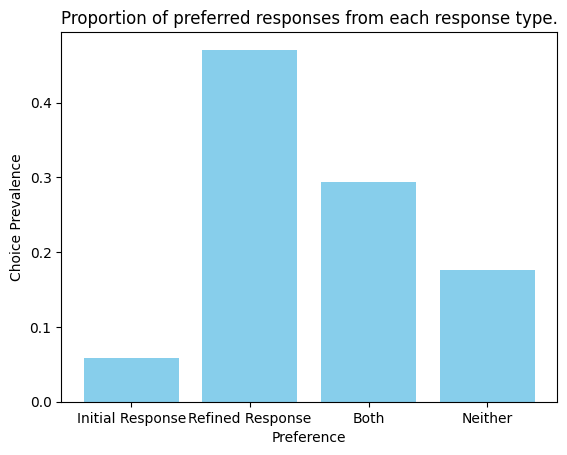

In [ ]:
preference_list = ['Initial Response', 'Refined Response', 'Both', 'Neither']
preferences_proportions = [x/len(answers) for x in preferences]
plt.bar(preference_list, preferences_proportions, color='skyblue')
plt.xlabel('Preference')
plt.ylabel('Choice Prevalence')
plt.title('Proportion of preferred responses from each response type.')
plt.show()

## 3/ Specific Use Case: Acronym Generation

### 3.1/ Few Shot Examples

In [ ]:
FEW_SHOT_INIT = """Title: A Survey of Active Network Research

Acronym: SONAR

###

Title: A Scalable, Commutative Replica Dictatorship for Practical Optimistic Replication

Acronym: SCRATCHPAD

###

Title: Bidirectional Encoder Representations from Transformers

Acronym: BERT

###

Title: Sequence to Sequence Learning with Neural Networks

Acronym: Seq2Seq

###

Title: Densely Connected Convolutional Networks for Image Classification

Acronym: DenseNet

###

Title: A Dynamic Programming Algorithm for RNA Secondary Structure Prediction

Acronym: DYNALIGN

###

Title: Fast Parallel Algorithms for Short-Range Molecular Dynamics

Acronym: FASTMD

###

Title: Real-Time Collaborative Editing Systems

Acronym: COCOON

###

Title: Efficient Data Structures for Large Scale Graph Processing

Acronym: EDGE

###

Title: A program to teach students at UT Southwestern learn about aging

Acronym: SAGE

###

Title: Underwater breathing without external accessories

Acronym: SCUBA

###

Title: An educational training module for professionals

Acronym: LEAP

###

Title: Teaching a leadership program

Acronym: LEAD

###"""

In [ ]:
FEW_SHOT_FEEDBACK = """We want to score each acronym on five qualities: i) ease of pronunciation, ii) ease of spelling, and iii) relation to the title, iv) positive connotation, v) well-known.

Here are some examples of this scoring rubric:

Title: Sequence to Sequence Learning with Neural Networks

Acronym: STSLWN

Scores:

* Ease of pronunciation: STSLWN is pronounced ess-tee-ess-ell-double-you-enn. This is a very difficult acronym to pronounce. 1/5
* Ease of spelling: STSLWN is a very difficult acronym to spell. 1/5
* Relation to title: STSLWN has no relation to the title. 1/5
* Positive connotation: STSLWN is meaningless, thus it has no positive connotation. 1/5
* Well-known: STSLWN is not a well-known acronym. 1/5

* Total score: 5/25

###

Title: Sequence to Sequence Learning with Neural Networks

Acronym: STSLN

Scores:

* Ease of pronunciation: STSLN is pronounced ess-tee-ess-ell-en. This is easier acronym to pronounce. 2/5
* Ease of spelling: STSLN is not too easy to spell. 2/5
* Relation to title: STSLN has no relation to the title. It is just a random acronym. 1/5
* Positive connotation: STSLN is not a positive acronym. It is just a random acronym. 1/5
* Well-known: STSLN is not a well-known acronym. 1/5

* Total score: 7/25

###

Title: Sequence to Sequence Learning with Neural Networks

Acronym: Seq2Seq

Scores:

* Ease of pronunciation: Seq2Seq is pronounced seq-two-seq. This is easy acronym to pronounce. 4/5
* Ease of spelling: Seq2Seq is easy to spell. 4/5
* Relation to title: Seq2Seq mentions sequence which is somewhat related to the title. 3/5
* Positive connotation: Seq2Seq is a positive acronym. It gives out a sense of ease with which the learning algorithm can be used. 5/5
* Well-known: Seq2Seq is close to the word sequence which is a well-known word. 4/5

* Total score: 20/25

###

Title: A program to teach students at UT Southwestern learn about aging

Acronym: ASAUL

Scores:

* Ease of pronunciation: ASAUL is pronounced "ah-saul". This is an easy acronym to pronounce. 4/5
* Ease of spelling: ASAUL is easy to spell. 5/5
* Relation to title: ASAUL stands for "Aging Students at UT Southwestern", so it is directly related to the title. 5/5
* Positive connotation: ASAUL is a neutral acronym. 3/5
* Well-known: ASAUL is not a well-known acronym. 1/5

* Total score: 18/25

###

Title: A program to teach students at UT Southwestern learn about aging

Acronym: AGELESS

Scores:

* Ease of pronunciation: AGELESS is pronounced "ay-juh-less". This is easy acronym to pronounce. 4/5
* Ease of spelling: AGELESS is easy to spell. 5/5
* Relation to title: AGELESS is directly related to the title. 5/5
* Positive connotation: AGELESS is a positive acronym. It gives out a sense of youthfulness and timelessness. 5/5
* Well-known: AGELESS is not a well-known acronym. 2/5

* Total score: 21/25

###

Title: A program to teach students at UT Southwestern learn about aging

Acronym: SAGE

Scores:

* Ease of pronunciation: SAGE is pronounced "sayj". This is easy acronym to pronounce. 4/5
* Ease of spelling: SAGE is easy to spell. 4/5
* Relation to title: SAGE has a strong relation to the title. It stands for "Students at UT Southwestern learning about aging". 5/5
* Positive connotation: SAGE is a positive acronym. It implies wisdom and experience. 5/5
* Well-known: SAGE is a well-known word. 4/5

* Total score: 22/25

###

Title: Underwater breathing without external accessories

Acronym: UB-FREE

Scores:

* Ease of pronunciation:  UB-FREE is pronounced "you-bee-free". This is easy acronym to pronounce. 4/5
* Ease of spelling: UB-FREE is easy to spell. 4/5
* Relation to title: UB-FREE mentions "underwater breathing" which is related to the title. 4/5
* Positive connotation: UB-FREE is a positive acronym. It implies freedom and convenience. 5/5
* Well-known: UB-FREE is not a well-known acronym. 1/5

* Total score: 18/25

###

Title: Underwater breathing without external accessories

Acronym: UBPA

Scores:

* Ease of pronunciation: UBPA is pronounced "uhb-puh". This is an easy acronym to pronounce. 4/5
* Ease of spelling: UBPA is easy to spell. 4/5
* Relation to title: UBPA stands for "Underwater Breathing Product for no Accessories" which is related to the title. 5/5
* Positive connotation: UBPA is a positive acronym. 5/5
* Well-known: UBPA is not a well-known acronym. 1/5

* Total score: 19/25

###

Title: Underwater breathing without external accessories

Acronym: SCUBA

Scores:

* Ease of pronunciation: SCUBA is pronounced "skoo-bah". This is an easy acronym to pronounce. 4/5
* Ease of spelling: SCUBA is easy to spell. 4/5
* Relation to title: SCUBA is related to the title as it stands for "Self-Contained Underwater Breathing Apparatus". 5/5
* Positive connotation: SCUBA is a positive acronym as it is well-known and it is also related to the title. 5/5
* Well-known: SCUBA is a very well-known acronym. 5/5

* Total score: 23/25

###

Title: An educational training module for professionals

Acronym: ET-PRO

Scores:

* Ease of pronunciation: ET-PRO is pronounced "et-pro". This is easy acronym to pronounce. 4/5
* Ease of spelling: ET-PRO is easy to spell. 5/5
* Relation to title: ET-PRO mentions "training" which is somewhat related to the title. 2/5
* Positive connotation: ET-PRO is a positive acronym. It gives out a sense of professionalism and expertise. 5/5
* Well-known: ET-PRO is not a well-known acronym. 2/5

* Total score: 18/25

###

Title: An educational training module for professionals

Acronym: TPET

Scores:

* Ease of pronunciation: TPET is pronounced "tee-pet". This is an easy acronym to pronounce. 4/5
* Ease of spelling: TPET is easy to spell. 4/5
* Relation to title: TPET stands for "Training Professional Educators Training" which is related to the title. 4/5
* Positive connotation: TPET is a positive acronym. It gives out a sense of ease with which the training module can be used. 5/5
* Well-known: TPET is not a well-known acronym. 2/5

* Total score: 19/25

###

Title: An educational training module for professionals

Acronym: LEAP

Scores:

* Ease of pronunciation:  LEAP is pronounced "leap". This is an easy acronym to pronounce. 5/5
* Ease of spelling: LEAP is easy to spell. 5/5
* Relation to title: LEAP is related to the title because it stands for "Learning for Educational Advancement and Professionalism". 5/5
* Positive connotation: LEAP is a positive acronym that implies progress and success. 5/5
* Well-known: LEAP is a well-known acronym. 5/5

* Total score: 24/25

###

Title: Teaching a leadership program

Acronym: TL-LEAD

Scores:

* Ease of pronunciation: TL-LEAD is pronounced "tul-led". This is easy acronym to pronounce. 4/5
* Ease of spelling: TL-LEAD is easy to spell. 4/5
* Relation to title: TL-LEAD mentions "lead" which is somewhat related to the title. 3/5
* Positive connotation: TL-LEAD is a positive acronym. It gives out a sense of ease with which the program can be used. 5/5
* Well-known: TL-LEAD is not a well-known acronym. 2/5

* Total score: 18/25

###

Title: Teaching a leadership program

Acronym: TLP

Scores:

* Ease of pronunciation:  TLP is pronounced "tee-ell-pee". This is easy acronym to pronounce. 4/5
* Ease of spelling: TLP is easy to spell. 4/5
* Relation to title: TLP stands for "teaching a leadership program", which is related to the title. 5/5
* Positive connotation: TLP is a positive acronym. It gives out a sense of ease with which the program can be taught. 5/5
* Well-known: TLP is not a well-known acronym. 2/5

* Total score: 20/25

###

Title: Teaching a leadership program

Acronym: LEAD

Scores:

* Ease of pronunciation: LEAD is pronounced "led". This is an easy acronym to pronounce. 4/5
* Ease of spelling: LEAD is easy to spell. 5/5
* Relation to title: LEAD is an acronym for "Leadership". It is related to the title. 5/5
* Positive connotation: LEAD has a positive connotation associated with it. 5/5
* Well-known: LEAD is a well-known acronym. 5/5

* Total score: 21/25

###"""

In [ ]:
FEW_SHOT_REFINE = """
We want to iteratively improve acronyms. To help improve, scores for each acronym on five desired traits are provided: i) ease of pronunciation, ii) ease of spelling, and iii) relation to the title, iv) positive connotation, v) well-known.

Title: Sequence to Sequence Learning with Neural Networks

Acronym: STSLWN

Scores:

* Ease of pronunciation: STSLWN is pronounced ess-tee-ess-ell-double-you-enn. This is a very difficult acronym to pronounce. 1/5
* Ease of spelling: STSLWN is a very difficult acronym to spell. 1/5
* Relation to title: STSLWN has no relation to the title. 1/5
* Positive connotation: STSLWN is meaningless, thus it has no positive connotation. 1/5
* Well-known: STSLWN is not a well-known acronym. 1/5

* Total score: 5/25

Okay, let's use this feedback to improve the acronym.

Title: Sequence to Sequence Learning with Neural Networks

Acronym: STSLN

Scores:

* Ease of pronunciation: STSLN is pronounced ess-tee-ess-ell-en. This is easier acronym to pronounce. 2/5
* Ease of spelling: STSLN is not too easy to spell. 2/5
* Relation to title: STSLN has no relation to the title. It is just a random acronym. 1/5
* Positive connotation: STSLN is not a positive acronym. It is just a random acronym. 1/5
* Well-known: STSLN is not a well-known acronym. 1/5

* Total score: 7/25

Okay, let's use this feedback to improve the acronym.

Title: Sequence to Sequence Learning with Neural Networks

Acronym: Seq2Seq

Scores:

* Ease of pronunciation: Seq2Seq is pronounced seq-two-seq. This is easy acronym to pronounce. 4/5
* Ease of spelling: Seq2Seq is easy to spell. 4/5
* Relation to title: Seq2Seq mentions sequence which is somewhat related to the title. 3/5
* Positive connotation: Seq2Seq is a positive acronym. It gives out a sense of ease with which the learning algorithm can be used. 5/5
* Well-known: Seq2Seq is close to the word sequence which is a well-known word. 4/5

* Total score: 20/25

Okay, let's use this feedback to improve the acronym.

###

We want to iteratively improve acronyms. To help improve, scores for each acronym on five desired traits are provided: i) ease of pronunciation, ii) ease of spelling, and iii) relation to the title, iv) positive connotation, v) well-known.

Title: A program to teach students at UT Southwestern learn about aging

Acronym: ASAUL

Scores:

* Ease of pronunciation: ASAUL is pronounced "ah-saul". This is an easy acronym to pronounce. 4/5
* Ease of spelling: ASAUL is easy to spell. 5/5
* Relation to title: ASAUL stands for "Aging Students at UT Southwestern", so it is directly related to the title. 5/5
* Positive connotation: ASAUL is a neutral acronym. 3/5
* Well-known: ASAUL is not a well-known acronym. 1/5

* Total score: 18/25

Okay, let's use this feedback to improve the acronym.

Title: A program to teach students at UT Southwestern learn about aging

Acronym: AGELESS

Scores:

* Ease of pronunciation: AGELESS is pronounced "ay-juh-less". This is easy acronym to pronounce. 4/5
* Ease of spelling: AGELESS is easy to spell. 5/5
* Relation to title: AGELESS is directly related to the title. 5/5
* Positive connotation: AGELESS is a positive acronym. It gives out a sense of youthfulness and timelessness. 5/5
* Well-known: AGELESS is not a well-known acronym. 2/5

* Total score: 21/25

Okay, let's use this feedback to improve the acronym.

Title: A program to teach students at UT Southwestern learn about aging

Acronym: SAGE

Scores:

* Ease of pronunciation: SAGE is pronounced "sayj". This is easy acronym to pronounce. 4/5
* Ease of spelling: SAGE is easy to spell. 4/5
* Relation to title: SAGE has a strong relation to the title. It stands for "Students at UT Southwestern learning about aging". 5/5
* Positive connotation: SAGE is a positive acronym. It implies wisdom and experience. 5/5
* Well-known: SAGE is a well-known word. 4/5

* Total score: 22/25

Okay, let's use this feedback to improve the acronym.

###

We want to iteratively improve acronyms. To help improve, scores for each acronym on five desired traits are provided: i) ease of pronunciation, ii) ease of spelling, and iii) relation to the title, iv) positive connotation, v) well-known.

Title: Underwater breathing without external accessories

Acronym: UB-FREE

Scores:

* Ease of pronunciation:  UB-FREE is pronounced "you-bee-free". This is easy acronym to pronounce. 4/5
* Ease of spelling: UB-FREE is easy to spell. 4/5
* Relation to title: UB-FREE mentions "underwater breathing" which is related to the title. 4/5
* Positive connotation: UB-FREE is a positive acronym. It implies freedom and convenience. 5/5
* Well-known: UB-FREE is not a well-known acronym. 1/5

* Total score: 18/25

Okay, let's use this feedback to improve the acronym.

Title: Underwater breathing without external accessories

Acronym: UBPA

Scores:

* Ease of pronunciation: UBPA is pronounced "uhb-puh". This is an easy acronym to pronounce. 4/5
* Ease of spelling: UBPA is easy to spell. 4/5
* Relation to title: UBPA stands for "Underwater Breathing Product for no Accessories" which is related to the title. 5/5
* Positive connotation: UBPA is a positive acronym. 5/5
* Well-known: UBPA is not a well-known acronym. 1/5

* Total score: 19/25

Okay, let's use this feedback to improve the acronym.

Title: Underwater breathing without external accessories

Acronym: SCUBA

Scores:

* Ease of pronunciation: SCUBA is pronounced "skoo-bah". This is an easy acronym to pronounce. 4/5
* Ease of spelling: SCUBA is easy to spell. 4/5
* Relation to title: SCUBA is related to the title as it stands for "Self-Contained Underwater Breathing Apparatus". 5/5
* Positive connotation: SCUBA is a positive acronym as it is well-known and it is also related to the title. 5/5
* Well-known: SCUBA is a very well-known acronym. 5/5

* Total score: 23/25

Okay, let's use this feedback to improve the acronym.

###

We want to iteratively improve acronyms. To help improve, scores for each acronym on five desired traits are provided: i) ease of pronunciation, ii) ease of spelling, and iii) relation to the title, iv) positive connotation, v) well-known.

Title: An educational training module for professionals

Acronym: ET-PRO

Scores:

* Ease of pronunciation: ET-PRO is pronounced "et-pro". This is easy acronym to pronounce. 4/5
* Ease of spelling: ET-PRO is easy to spell. 5/5
* Relation to title: ET-PRO mentions "training" which is somewhat related to the title. 2/5
* Positive connotation: ET-PRO is a positive acronym. It gives out a sense of professionalism and expertise. 5/5
* Well-known: ET-PRO is not a well-known acronym. 2/5

* Total score: 18/25

Okay, let's use this feedback to improve the acronym.

Title: An educational training module for professionals

Acronym: TPET

Scores:

* Ease of pronunciation: TPET is pronounced "tee-pet". This is an easy acronym to pronounce. 4/5
* Ease of spelling: TPET is easy to spell. 4/5
* Relation to title: TPET stands for "Training Professional Educators Training" which is related to the title. 4/5
* Positive connotation: TPET is a positive acronym. It gives out a sense of ease with which the training module can be used. 5/5
* Well-known: TPET is not a well-known acronym. 2/5

* Total score: 19/25

Okay, let's use this feedback to improve the acronym.

Title: An educational training module for professionals

Acronym: LEAP

Scores:

* Ease of pronunciation:  LEAP is pronounced "leap". This is an easy acronym to pronounce. 5/5
* Ease of spelling: LEAP is easy to spell. 5/5
* Relation to title: LEAP is related to the title because it stands for "Learning for Educational Advancement and Professionalism". 5/5
* Positive connotation: LEAP is a positive acronym that implies progress and success. 5/5
* Well-known: LEAP is a well-known acronym. 5/5

* Total score: 24/25

Okay, let's use this feedback to improve the acronym.

###

We want to iteratively improve acronyms. To help improve, scores for each acronym on five desired traits are provided: i) ease of pronunciation, ii) ease of spelling, and iii) relation to the title, iv) positive connotation, v) well-known.

Title: Teaching a leadership program

Acronym: TL-LEAD

Scores:

* Ease of pronunciation: TL-LEAD is pronounced "tul-led". This is easy acronym to pronounce. 4/5
* Ease of spelling: TL-LEAD is easy to spell. 4/5
* Relation to title: TL-LEAD mentions "lead" which is somewhat related to the title. 3/5
* Positive connotation: TL-LEAD is a positive acronym. It gives out a sense of ease with which the program can be used. 5/5
* Well-known: TL-LEAD is not a well-known acronym. 2/5

* Total score: 18/25

Okay, let's use this feedback to improve the acronym.

Title: Teaching a leadership program

Acronym: TLP

Scores:

* Ease of pronunciation:  TLP is pronounced "tee-ell-pee". This is easy acronym to pronounce. 4/5
* Ease of spelling: TLP is easy to spell. 4/5
* Relation to title: TLP stands for "teaching a leadership program", which is related to the title. 5/5
* Positive connotation: TLP is a positive acronym. It gives out a sense of ease with which the program can be taught. 5/5
* Well-known: TLP is not a well-known acronym. 2/5

* Total score: 20/25

Okay, let's use this feedback to improve the acronym.

Title: Teaching a leadership program

Acronym: LEAD

Scores:

* Ease of pronunciation: LEAD is pronounced "led". This is an easy acronym to pronounce. 4/5
* Ease of spelling: LEAD is easy to spell. 5/5
* Relation to title: LEAD is an acronym for "Leadership". It is related to the title. 5/5
* Positive connotation: LEAD has a positive connotation associated with it. 5/5
* Well-known: LEAD is a well-known acronym. 5/5

* Total score: 21/25

Okay, let's use this feedback to improve the acronym.

###
"""

### 3.2/ Code

In [ ]:
INTER_SEP = "\n\n###\n\n"
INTRA_SEP = "\n\n"

# 3 different prompt crafting functions for the initial, feedback and refine queries.

def make_initial_query_acronym(title):
    """ Returns an accoronym for a given title. See appendix for FEW_SHOT_INIT generation."""

    template = """Title: {title}

Acronym: {answer}"""

    question_prefix="Title: "

    return f"{FEW_SHOT_INIT}{question_prefix}{title}{INTRA_SEP}"

def make_feedback_query_acronym(title, acronym):
    """Gives details feedback based on 5 predefined criteria for a given acronym. See appendix for FEW_SHOT_FEEDBACK generation."""

    question = f"""Title: {title}

Acronym: {acronym}"""
    return f"""{FEW_SHOT_FEEDBACK}{question}"""

def make_refine_query_acronym(previous_acronyms, title):
    """Returns a refined query based on previous acronyms and a feedback on those acronyms. See appendix for FEW_SHOT_REFINE generation."""

    previous_answers = ""
    for acronym, scores in previous_acronyms.items():
        previous_answers += f"""Title: {title}

Acronym: {acronym}

Scores:

{scores}

Okay, let's use this feedback to improve the acronym.

"""
    question = f"""Title: {title}"""
    return f"{FEW_SHOT_REFINE}{previous_answers}{question}{INTRA_SEP}"

In [ ]:
# Main self_refine loop for acronym generation

def self_refine_acronym(get_response, num_iterations, title):
    """
    Simulates the self_refine process for acronyms.

    - get_response: generation function
    - num_iterations: number of iterations
    - title: title which needs an acronym
    """
    previous_acronyms = dict()

    for i in range(num_iterations):

        if i == 0: # Initial prompt
            initial_prompt = make_initial_query_acronym(title)
            response = get_response(initial_prompt)
            try:
                acronym = response.split("Acronym:")[1].strip().split("\n")[0].strip() # Extract the suggested acronym
            except IndexError:
                print("Initial response not properly formatted.") # Keep previous acronym
                break
        else: # Refine iterations
            refine_prompt = make_refine_query_acronym(previous_acronyms, title)
            response = get_response(refine_prompt)
            try:
                acronym = response.split("Acronym:")[1].strip().split("\n")[0].strip() # Extract the suggested acronym
            except IndexError:
                print("Refined response not properly formatted.")
                pass

        scores_prompt = make_feedback_query_acronym(title=title, acronym=acronym)
        response = get_response(scores_prompt)

        try:
            scores = response.split("Scores:")[1].strip() # Extract the suggested score details
            scores = scores.split("#")[0].strip()
            previous_acronyms[acronym] = scores
        except IndexError:
            print("Feedback response not properly formatted.")
            pass

    return previous_acronyms

In [ ]:
# Test list enerated using LLMs
test_titles = [
    "National Environmental Protection Agency",
    "Global Climate Change Initiative",
    "International Space Exploration Program",
    "Advanced Technology Research Institute",
    "Sustainable Energy Development Fund",
    "Digital Innovation and Technology Hub",
    "Public Health and Safety Council",
    "Educational Resource Development Center",
    "Urban Planning and Design Forum",
    "Cyber Security and Privacy Alliance"
]

runs = []

for title in test_titles:
    runs.append(self_refine_acronym(get_response_openai, 4, title))

Feedback response not properly formatted.


### 3.3/ Evaluation

In [ ]:
pattern = r"Total score.*?(\d+)/"
total_scores = {title:[] for title in test_titles}

for i, run in enumerate(runs):
    title = test_titles[i]
    for acronym, scores in run.items():
        total_scores[title].append(re.search(pattern, scores).group(1))
        print(f"Title: {title}")
        print(f"Acronym: {acronym}")
        print(f"Scores: {scores}")
        print("\n\n")

Title: National Environmental Protection Agency
Acronym: NEPA
Scores: * Ease of pronunciation: NEPA is pronounced "nee-pah". This is easy to pronounce. 4/5
* Ease of spelling: NEPA is easy to spell. 5/5
* Relation to title: NEPA stands for "National Environmental Protection Agency," directly related to the title. 5/5
* Positive connotation: NEPA is a neutral acronym; it doesn't carry any negative connotations. 3/5
* Well-known: NEPA is a somewhat well-known acronym due to its usage in environmental contexts. 3/5

* Total score: 20/25



Title: National Environmental Protection Agency
Acronym: GREEN
Scores: * Ease of pronunciation: GREEN is pronounced "green". This is an easy acronym to pronounce. 5/5
* Ease of spelling: GREEN is easy to spell. 5/5
* Relation to title: GREEN is somewhat related to the title, as it evokes environmental themes but not explicitly present in the full title. 4/5
* Positive connotation: GREEN has a positive connotation, often associated with eco-friendliness 

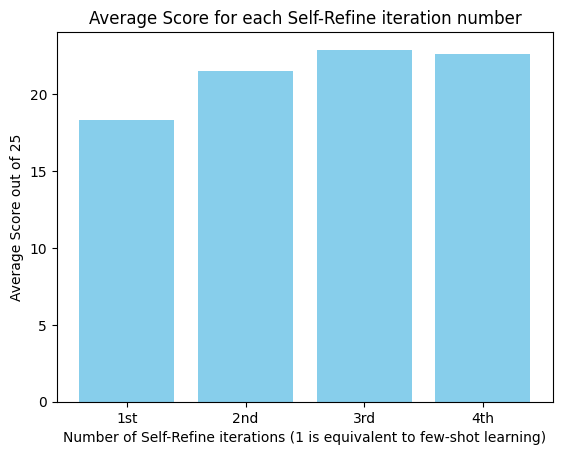

In [ ]:
sum_scores = [0, 0, 0, 0]
count_scores = [0, 0, 0, 0]

for scores in total_scores.values():
    for i, score in enumerate(scores):
        sum_scores[i] += int(score)
        count_scores[i] += 1

averages = [sum_scores[i]/count_scores[i] for i in range(4)]


positions = ['1st', '2nd', '3rd', '4th']
plt.bar(positions, averages, color='skyblue')
plt.xlabel('Number of Self-Refine iterations (1 is equivalent to few-shot learning)')
plt.ylabel('Average Score out of 25')
plt.title('Average Score for each Self-Refine iteration number')
plt.show()


Disclaimer: These are only the self proclaimed scores from the Self-Refine model, which will tend to optimize blindly for better self-evaluation on the 5 criteria chosen in the few-shot dataset. This does not necessarily align with human preferences, as shown by the fact that acronyms such as "CLIMATE" or "SPACE" receive very good scores despite not even being acronyms.

Also note that LLMs using Self-Refine generally need to have sufficient performance to follow prompt guidelines and required formatting, otherwise the self-refine process will fail or become unstable. This generally is not a problem for gpt-4o, but is for gpt-4o-mini or other less performant models (as seen here, where 1 of 20 queries was not properly formatted).

## 4/ Appendix

### 4.1/ Few Shot Generation
Below is the code for generating the few shot examples used in the above code (FEW_SHOT_INIT, FEW_SHOT_FEEDBACK and FEW_SHOT_REFINE).
This was done using the dataset provided with self-refine

In [ ]:
# with open("data/prompt/acronym/init.jsonl", "r") as file:
#     json_data = file.read()
# examples_df = pd.read_json(StringIO(json_data), orient="records", lines=True)

# template = """Title: {title}

# Acronym: {answer}"""

# prompt = []
# for _, row in examples_df.iterrows():
#     prompt.append(template.format(title=row["title"], answer=row["acronym"]))

# few_shot_examples_init = INTER_SEP.join(prompt) + INTER_SEP

In [ ]:
# ANNEX: Code for generating the few-shot examples for the acronym task based on the dataset provided with self-refine

# template = """Title: {title}

# Acronym: {answer}

# Scores:

# * Ease of pronunciation: {pronunciation_score}
# * Ease of spelling: {spelling_score}
# * Relation to title: {relation_score}
# * Positive connotation: {connotation_score}
# * Well-known: {well_known_score}

# * Total score: {total_score}"""

# instruction = """We want to score each acronym on five qualities: i) ease of pronunciation, ii) ease of spelling, and iii) relation to the title, iv) positive connotation, v) well-known.

# Here are some examples of this scoring rubric:

# """

# with open("data/prompt/acronym/feedback.jsonl", "r") as file:
#     json_data = file.read()
# examples_df = pd.read_json(StringIO(json_data), orient="records", lines=True)
# prompt = []
# for _, row in examples_df.iterrows():
#     prompt.append(
#         template.format(
#             title=row["title"],
#             answer=row["acronym"],
#             pronunciation_score=row["pronunciation_score"],
#             spelling_score=row["spelling_score"],
#             relation_score=row["relation_score"],
#             connotation_score=row["connotation_score"],
#             well_known_score=row["well_known_score"],
#             total_score=row["total_score"],
#         )
#     )

# formated_feedback_few_shot = instruction + INTER_SEP.join(prompt) + INTER_SEP

In [ ]:
# def group_example(incrementally_improving_examples):
#     """Returns an example of how a user might incrementally improve an acronym for a given title. """

#     instr = """We want to iteratively improve acronyms. To help improve, scores for each acronym on five desired traits are provided: i) ease of pronunciation, ii) ease of spelling, and iii) relation to the title, iv) positive connotation, v) well-known.

# """
#     example_template = """Title: {title}

# Acronym: {acronym}

# Scores:

# * Ease of pronunciation: {pronunciation_score}
# * Ease of spelling: {spelling_score}
# * Relation to title: {relation_score}
# * Positive connotation: {connotation_score}
# * Well-known: {well_known_score}

# * Total score: {total_score}

# Okay, let's use this feedback to improve the acronym.

# """

#     prompt = []
#     for example in incrementally_improving_examples:
#         prompt.append(example_template.format(**example))

#     prompt = "".join(prompt)
#     prompt = instr + prompt
#     return prompt.strip()

# with open("data/prompt/acronym/feedback.jsonl", "r") as file:
#     json_data = file.read()
# examples_df = pd.read_json(StringIO(json_data), orient="records", lines=True)
# grouped_examples = examples_df.groupby("example")

# prompt = []
# for _, group in grouped_examples:
#     group["numerical_score"] = group["total_score"].apply(lambda x: int(x.split("/")[0].strip()))
#     group = group.sort_values("numerical_score")
#     prompt.append(group_example(group.to_dict("records")))

# few_shot_examples_refine =  INTER_SEP.join(prompt) + INTER_SEP

### 4.2/ Results from Part 3
Below is a list of results produced by our implementation of Self-Refine for acronym generation

**Results from gpt-4o:**

Title: National Environmental Protection Agency
Acronym: NEPA
Scores: **

* **Ease of pronunciation**: NEPA is pronounced "nee-pah". This is easy to pronounce. 4/5
* **Ease of spelling**: NEPA is easy to spell. 5/5
* **Relation to title**: NEPA stands for "National Environmental Policy Act," which is related to the title but not exactly matching the wording. However, it is very close in terms of environmental protection. 4/5
* **Positive connotation**: NEPA has a positive connotation, as it pertains to environmental protection and policy. 4/5
* **Well-known**: NEPA is a well-known acronym in the context of environmental law and policy. 4/5

* **Total score**: 21/25



Title: National Environmental Protection Agency
Acronym: EPA
Scores: **

* Ease of pronunciation: EPA is pronounced "ee-pee-ay". This is an easy acronym to pronounce. 4/5
* Ease of spelling: EPA is easy to spell. 5/5
* Relation to title: EPA stands for "Environmental Protection Agency" which is directly related to the title. 5/5
* Positive connotation: EPA generally has a positive connotation as it is associated with environmental protection and advocacy. 4/5
* Well-known: EPA is a very well-known acronym as it is widely recognized in discussions about environmental policies and regulations. 5/5

* **Total score: 23/25**



Title: National Environmental Protection Agency
Acronym: ENVIRO
Scores: * Ease of pronunciation: ENVIRO is pronounced "en-vye-ro". This is an easy acronym to pronounce. 4/5
* Ease of spelling: ENVIRO is fairly easy to spell. 4/5
* Relation to title: ENVIRO relates directly to the title, as it references "Environmental". 5/5
* Positive connotation: ENVIRO is a positive acronym as it suggests a focus on environmental protection and sustainability. 5/5
* Well-known: ENVIRO is not a well-known acronym by itself, but it is closely related to environmental topics, which are widely recognized. 3/5

* Total score: 21/25



Title: Global Climate Change Initiative
Acronym: GCCI
Scores: * Ease of pronunciation: GCCI is pronounced "gee-sea-sea-eye". This is a somewhat difficult acronym to pronounce smoothly. 3/5
* Ease of spelling: GCCI is relatively easy to spell. 4/5
* Relation to title: GCCI stands for "Global Climate Change Initiative," which is directly related to the title. 5/5
* Positive connotation: GCCI has a positive connotation as it relates to initiatives aimed at combating climate change. 4/5
* Well-known: While the acronym GCCI may not be widely recognized, the concept of global climate change initiatives is well-known. 3/5

* Total score: 19/25



Title: Global Climate Change Initiative
Acronym: GCLI
Scores: * Ease of pronunciation: GCLI is pronounced "gee-see-ell-eye". This is not very easy to pronounce due to the letters being pronounced individually. 2/5
* Ease of spelling: GCLI is relatively easy to spell, as it consists of four straightforward letters. 4/5
* Relation to title: GCLI stands for "Global Climate Change Initiative", which is directly related to the title. 5/5
* Positive connotation: GCLI has a positive connotation as it reflects an initiative to address an important global issue. 4/5
* Well-known: GCLI is not widely recognized, though it may be known within specific contexts related to climate initiatives. 2/5

* Total score: 17/25



Title: Global Climate Change Initiative
Acronym: CLIMATE
Scores: * Ease of pronunciation: CLIMATE is pronounced "clai-mit". This is an easy acronym to pronounce. 4/5
* Ease of spelling: CLIMATE is easy to spell. 5/5
* Relation to title: CLIMATE is directly related to the title since it refers to climate, which is a central element of the title. 5/5
* Positive connotation: CLIMATE has a positive connotation as it relates to awareness and action toward environmental issues. 4/5
* Well-known: CLIMATE is a well-known term, especially in discussions around environmental issues. 4/5

* Total score: 22/25



Title: International Space Exploration Program
Acronym: ISEP
Scores: * Ease of pronunciation: ISEP is pronounced "eye-sep". This is an easy acronym to pronounce. 4/5
* Ease of spelling: ISEP is easy to spell. 5/5
* Relation to title: ISEP is an abbreviation for "International Space Exploration Program", which is directly related to the title. 5/5
* Positive connotation: ISEP has a positive connotation as it evokes thoughts of innovation and exploration. 4/5
* Well-known: ISEP is not a widely recognized acronym, although it does combine well-known terms. 2/5

* Total score: 20/25



Title: International Space Exploration Program
Acronym: SPACE
Scores: * Ease of pronunciation: SPACE is pronounced "spayce". This is an easy acronym to pronounce. 5/5
* Ease of spelling: SPACE is easy to spell. 5/5
* Relation to title: SPACE directly relates to the title as it is part of the acronym itself for "Space Exploration". 5/5
* Positive connotation: SPACE has a positive connotation as it evokes curiosity and exploration. 5/5
* Well-known: SPACE is a very well-known word and concept, especially in relation to exploration. 5/5

* Total score: 25/25



Title: International Space Exploration Program
Acronym: EXPLORE
Scores: * Ease of pronunciation: EXPLORE is pronounced "eks-plor". This is an easy acronym to pronounce. 4/5
* Ease of spelling: EXPLORE is easy to spell. 5/5
* Relation to title: EXPLORE is directly related to the title as it signifies the act of space exploration. 5/5
* Positive connotation: EXPLORE has a very positive connotation, evoking a sense of adventure and discovery. 5/5
* Well-known: EXPLORE is not a traditional acronym, but the word itself is well-known and associated with curiosity and discovery. 4/5

* Total score: 23/25



Title: Advanced Technology Research Institute
Acronym: ATRI
Scores: * Ease of pronunciation: ATRI is pronounced "ay-tree". This is an easy acronym to pronounce. 4/5
* Ease of spelling: ATRI is easy to spell. 5/5
* Relation to title: ATRI stands for "Advanced Technology Research Institute", which is directly related to the title. 5/5
* Positive connotation: ATRI has a positive connotation as it relates to innovation and advancement. 4/5
* Well-known: ATRI is not a widely recognized acronym, though the words themselves are associated with well-known concepts. 2/5

* Total score: 20/25



Title: Advanced Technology Research Institute
Acronym: A-TECH
Scores: * Ease of pronunciation: A-TECH is pronounced "ay-tech". This is an easy acronym to pronounce. 4/5
* Ease of spelling: A-TECH is easy to spell. 5/5
* Relation to title: A-TECH stands for "Advanced Technology", directly related to the title. 5/5
* Positive connotation: A-TECH has a positive connotation, as it suggests innovation and advancement in technology. 5/5
* Well-known: A-TECH is not a very well-known acronym, though "tech" is a familiar term. 3/5

* Total score: 22/25



Title: Advanced Technology Research Institute
Acronym: INNOVATE
Scores: * Ease of pronunciation: INNOVATE is pronounced "in-oh-vayt". This is an easy acronym to pronounce. 4/5
* Ease of spelling: INNOVATE is easy to spell. 5/5
* Relation to title: INNOVATE relates directly to "Advanced Technology Research" as it implies innovation in technology. 5/5
* Positive connotation: INNOVATE has a positive connotation, suggesting progress and creativity. 5/5
* Well-known: INNOVATE is a well-known word associated with advancements and improvements. 4/5

* Total score: 23/25



Title: Sustainable Energy Development Fund
Acronym: SEDF
Scores: * Ease of pronunciation: SEDF is pronounced "seed-f". This is relatively easy to pronounce. 4/5
* Ease of spelling: SEDF is easy to spell. 5/5
* Relation to title: SEDF stands for "Sustainable Energy Development Fund", which is directly related to the title. 5/5
* Positive connotation: SEDF has a positive connotation as it implies sustainability and development in energy. 4/5
* Well-known: SEDF is not a widely recognized acronym. 2/5

* Total score: 20/25



Title: Sustainable Energy Development Fund
Acronym: GREEN
Scores: **

* **Ease of pronunciation:** GREEN is pronounced "green". This is an easy acronym to pronounce. 5/5
* **Ease of spelling:** GREEN is easy to spell. 5/5
* **Relation to title:** GREEN is directly related to the title, as it conveys a connotation of sustainability and is often associated with energy initiatives. 5/5
* **Positive connotation:** GREEN has a very positive connotation, suggesting eco-friendliness and sustainability. 5/5
* **Well-known:** GREEN is a well-known term, especially in the context of environmental discussions and initiatives. 5/5

* **Total score:** 25/25



Title: Sustainable Energy Development Fund
Acronym: ECO-FUND
Scores: * Ease of pronunciation: ECO-FUND is pronounced "ee-ko-fund". This is an easy acronym to pronounce. 4/5
* Ease of spelling: ECO-FUND is easy to spell. 5/5
* Relation to title: ECO-FUND is directly related to the title as it implies a focus on environmentally friendly funding for energy development. 5/5
* Positive connotation: ECO-FUND has a positive connotation, as it suggests sustainability and environmental responsibility. 5/5
* Well-known: ECO is a well-known prefix associated with ecology and environment, but ECO-FUND itself may not be widely recognized. 3/5

* Total score: 22/25



Title: Digital Innovation and Technology Hub
Acronym: DITH
Scores: * Ease of pronunciation: DITH is pronounced "dith". This is an easy acronym to pronounce. 4/5
* Ease of spelling: DITH is easy to spell. 5/5
* Relation to title: DITH refers directly to "Digital Innovation and Technology Hub," making it very relevant to the title. 5/5
* Positive connotation: DITH sounds neutral, lacking strong positive or negative connotations. 3/5
* Well-known: DITH is not a well-known acronym. 1/5

* Total score: 18/25



Title: Digital Innovation and Technology Hub
Acronym: DIT-Hub
Scores: * Ease of pronunciation: DIT-Hub is pronounced "dee-eye-tee-hub". This is a relatively easy acronym to pronounce. 4/5
* Ease of spelling: DIT-Hub is easy to spell. 5/5
* Relation to title: DIT-Hub directly relates to "Digital Innovation and Technology Hub", as it captures both the digital and hub elements. 5/5
* Positive connotation: DIT-Hub has a positive connotation, implying a center of creativity and advancement. 4/5
* Well-known: DIT-Hub is not a very well-known acronym, though "digital innovation" and "technology" are familiar concepts. 2/5

* Total score: 20/25



Title: Public Health and Safety Council
Acronym: PHSC
Scores: * Ease of pronunciation: PHSC is pronounced "pee-aych-ess-see." This is moderately difficult to pronounce. 2/5
* Ease of spelling: PHSC is straightforward to spell. 4/5
* Relation to title: PHSC stands for "Public Health and Safety Council," which is directly related to the title. 5/5
* Positive connotation: PHSC implies a focus on public health and safety, which carries a positive connotation. 4/5
* Well-known: PHSC is not a widely recognized acronym, though it could be understood in context. 2/5

* Total score: 17/25



Title: Public Health and Safety Council
Acronym: PHS Council
Scores: * Ease of pronunciation: PHS Council is pronounced "pee-aitch-ess council". This is relatively easy to pronounce but could be considered a bit cumbersome due to the inclusion of "Council". 3/5
* Ease of spelling: PHS Council is straightforward to spell but the word "Council" adds some complexity. 4/5
* Relation to title: PHS Council directly relates to the title as it stands for "Public Health and Safety Council". 5/5
* Positive connotation: PHS Council has a positive connotation as it represents a body focused on health and safety, which are generally viewed positively. 5/5
* Well-known: PHS Council is not a well-known acronym, though 'Public Health' and 'Safety' can be recognized individually. 2/5

* Total score: 19/25



Title: Educational Resource Development Center
Acronym: ERDC
Scores: * Ease of pronunciation: ERDC is pronounced "ee-ahr-dee-see". It is somewhat challenging to pronounce fluidly. 3/5
* Ease of spelling: ERDC is easy to spell. 4/5
* Relation to title: ERDC directly relates to "Educational Resource Development Center", capturing the key elements of the title. 5/5
* Positive connotation: ERDC is neutral; it doesn’t have a strong positive or negative connotation. 3/5
* Well-known: ERDC is not a widely recognized acronym. 1/5

* Total score: 16/25



Title: Educational Resource Development Center
Acronym: EDC
Scores: * Ease of pronunciation: EDC is pronounced "ee-dee-see". This is easy to pronounce. 4/5
* Ease of spelling: EDC is easy to spell. 5/5
* Relation to title: EDC stands for "Educational Resource Development Center", which is directly related to the title. 5/5
* Positive connotation: EDC has a neutral connotation but relates positively to education and resources. 4/5
* Well-known: EDC is not a widely recognized acronym, but it is somewhat known in the context of education. 3/5

* Total score: 21/25



Title: Educational Resource Development Center
Acronym: EduRes
Scores: * Ease of pronunciation: EduRes is pronounced "eh-doo-res". This is easy to pronounce. 4/5
* Ease of spelling: EduRes is relatively straightforward to spell, though it may require a moment of thought. 3/5
* Relation to title: EduRes directly relates to "Educational Resource Development Center", capturing the essence of the title. 5/5
* Positive connotation: EduRes has a positive connotation, suggesting a focus on education and resources. 4/5
* Well-known: EduRes is not a well-known acronym but aligns with common terminology in education. 2/5

* Total score: 18/25



Title: Urban Planning and Design Forum
Acronym: UPDF
Scores: * Ease of pronunciation: UPDF is pronounced "you-pee-dee-eff". This is somewhat easy to pronounce. 3/5
* Ease of spelling: UPDF is fairly easy to spell. 4/5
* Relation to title: UPDF contains initials that relate to "Urban Planning and Design Forum". 5/5
* Positive connotation: UPDF does not have a strong positive connotation; it's neutral. 3/5
* Well-known: UPDF is not a well-known acronym. 1/5

* Total score: 16/25



Title: Urban Planning and Design Forum
Acronym: UPF
Scores: * Ease of pronunciation: UPF is pronounced "you-pee-eff". This is an easy acronym to pronounce. 4/5
* Ease of spelling: UPF is easy to spell. 5/5
* Relation to title: UPF stands for "Urban Planning and Design Forum", which is directly related to the title. 5/5
* Positive connotation: UPF has a neutral connotation but can be seen as positive due to its focus on urban development. 3/5
* Well-known: UPF is not a widely recognized acronym. 2/5

* Total score: 19/25



Title: Urban Planning and Design Forum
Acronym: PLAN
Scores: * Ease of pronunciation: PLAN is pronounced "plan". This is an easy acronym to pronounce. 5/5
* Ease of spelling: PLAN is easy to spell. 5/5
* Relation to title: PLAN is closely related to the title as it refers to urban planning. 5/5
* Positive connotation: PLAN has a positive connotation, suggesting organization and foresight. 5/5
* Well-known: PLAN is a well-known term in the context of urban planning and design. 5/5

* Total score: 25/25

**Results from Gemini-2.0-flash:**

Title: National Environmental Protection Agency
Acronym: NEPA
Scores: **

*   **Ease of pronunciation:** NEPA is pronounced "nee-pah". This is an easy acronym to pronounce. **4/5**
*   **Ease of spelling:** NEPA is easy to spell. **5/5**
*   **Relation to title:** NEPA stands for National Environmental Protection Agency. Thus is it directly related to the title. **5/5**
*   **Positive connotation:** NEPA is a generally neutral, but recognizable acronym associated with environmental protection, which is often viewed positively though sometimes seen in an adversarial context by some industries. **4/5**
*   **Well-known:** NEPA is a relatively well-known acronym, especially in government, environmental science, and related fields. **4/5**

*   **Total score: 22/25**



Title: National Environmental Protection Agency
Acronym: EnPA
Scores: * Ease of pronunciation: EnPA is pronounced "en-pah". This is an easy acronym to pronounce. 4/5
* Ease of spelling: EnPA is easy to spell. 5/5
* Relation to title: EnPA stands for Environmental Protection Agency, which is very related to the title. 4/5
* Positive connotation: EnPA is a neutral acronym. 3/5
* Well-known: EnPA is not a well-known acronym. 1/5

* Total score: 17/25



Title: Global Climate Change Initiative
Acronym: GCCI
Scores: *   Ease of pronunciation: GCCI is pronounced "gee-see-see-eye". This is a relatively easy acronym to pronounce. 3/5
*   Ease of spelling: GCCI is easy to spell. 5/5
*   Relation to title: GCCI is a direct acronym for "Global Climate Change Initiative", so it is directly related to the title. 5/5
*   Positive connotation: GCCI is a neutral acronym. It represents an initative which is potentially benifical for the environment. 4/5
*   Well-known: GCCI is not a well-known acronym. 2/5

*   Total score: 19/25



Title: Global Climate Change Initiative
Acronym: GLOCLIM
Scores: *   Ease of pronunciation: GLOCLIM is pronounced "glow climb." This is a reasonably easy acronym to pronounce. 4/5
*   Ease of spelling: GLOCLIM is easy to spell. 5/5
*   Relation to title: GLOCLIM is derived from "GLObal CLIMate." So, this is directly related to the title. 5/5
*   Positive connotation: GLOCLIM is a neutral acronym. 3/5
*   Well-known: GLOCLIM is not a well-known acronym. 1/5

*   Total score: 18/25



Title: International Space Exploration Program
Acronym: ISEP
Scores: * Ease of pronunciation: ISEP is pronounced "eye-sep" or "iss-ep". This is a fairly easy acronym to pronounce. 4/5
* Ease of spelling: ISEP is easy to spell. 5/5
* Relation to title: ISEP stands for "International Space Exploration Program," directly related to the title. 5/5
* Positive connotation: ISEP sounds neutral to slightly positive, evoking ideas of progress and discovery. 4/5
* Well-known: ISEP is not readily a well-known acronym, but it is easily recalled. 2/5

* Total score: 20/25



Title: International Space Exploration Program
Acronym: SPACE
Scores: * Ease of pronunciation: SPACE is pronounced "space". This is an easy acronym to pronounce. 5/5
* Ease of spelling: SPACE is easy to spell. 5/5
* Relation to title: SPACE has a strong relation to the title, directly referencing space exploration. 5/5
* Positive connotation: SPACE has a very positive connotation, conjuring images of exploration, discovery, and the future. 5/5
* Well-known: SPACE is a well-known word and widely understood concept. 5/5

* Total score: 25/25



Title: Advanced Technology Research Institute
Acronym: ATRI
Scores: *   **Ease of pronunciation:** ATRI is pronounced "Ay-tree". This is easy to pronounce. 4/5
*   **Ease of spelling:** ATRI is easy to spell. 5/5
*   **Relation to title:** ATRI directly relates to the title as its constituent letters align with the first letter of each word in the acronym. 5/5
*   **Positive connotation:** ATRI is a neutral acronym. 3/5
*   **Well-known:** ATRI is not a well-known acronym outside of the specialized context it might be used in. 2/5

*   **Total score:** 19/25



Title: Advanced Technology Research Institute
Acronym: AT-RI
Scores: *   Ease of pronunciation: AT-RI is pronounced "at-ree". This is an easy acronym to pronounce. 4/5
*   Ease of spelling: AT-RI is easy to spell. 5/5
*   Relation to title: AT-RI includes recognizable elements from the title (Technology Research Institute). 4/5
*   Positive connotation: AT-RI is neutral but professional-sounding. 3/5
*   Well-known: AT-RI is not a well-known acronym. 2/5

* Total score: 18/25



Title: Advanced Technology Research Institute
Acronym: ART
Scores: **

*   **Ease of pronunciation:** ART is pronounced "art". This is an easy acronym to pronounce. 5/5
*   **Ease of spelling:** ART is easy to spell. 5/5
*   **Relation to title:** ART has some relation to the title as it stands for "Advanced Research Technology". 4/5
*   **Positive connotation:** ART has a positive connotation associated with it. It is a well known word that evokes creativity. 5/5
*   **Well-known:** ART is a well-known word. 5/5

*   **Total score: 24/25**



Title: Sustainable Energy Development Fund
Acronym: SEDF
Scores: *   Ease of pronunciation: SEDF is pronounced "sed-eff". This is easy acronym to pronounce. 4/5
*   Ease of spelling: SEDF is easy to spell. 5/5
*   Relation to title: SEDF stands for "Sustainable Energy Development Fund," which is precisely the title. 5/5
*   Positive connotation: SEDF has a positive connotation, suggesting growth and responsibility. 4/5
*   Well-known: SEDF is not a well-known acronym. 2/5

*   Total score: 20/25



Title: Sustainable Energy Development Fund
Acronym: SEED
Scores: * Ease of pronunciation: SEED is pronounced "seed". This is an easy acronym to pronounce. 5/5
* Ease of spelling: SEED is easy to spell. 5/5
* Relation to title: SEED has a strong relation to the title, implying growth and development, which aligns with the fund's purpose. 5/5
* Positive connotation: SEED has a very positive connotation, associated with growth, potential, and sustainability. 5/5
* Well-known: SEED is a common and well-known word. 5/5

* Total score: 25/25



Title: Digital Innovation and Technology Hub
Acronym: DITH
Scores: *   **Ease of pronunciation:** DITH is pronounced "dith". This is an easy acronym to pronounce. 4/5

*   **Ease of spelling:** DITH is easy to spell. 5/5

*   **Relation to title:** DITH stands for "Digital Innovation and Technology Hub". which is strongly related to the title. 5/5

*   **Positive connotation:** DITH is a neutral acronym. 3/5

*   **Well-known:** DITH is not a well-known acronym. 1/5

*   **Total score:** 18/25



Title: Public Health and Safety Council
Acronym: PHSC
Scores: *   Ease of pronunciation: PHSC is pronounced "pee-aitch-ess-see". This is not too difficult to pronounce. 3/5
*   Ease of spelling: PHSC is relatively easy to spell. 4/5
*   Relation to title: PHSC is directly related to the title, as it stands for "Public Health and Safety Council". 5/5
*   Positive connotation: PHSC is a positive acronym. Public health and safety are important and beneficial concepts. 5/5
*   Well-known: PHSC is not a well-known acronym outside of specific contexts. 2/5

*   Total score: 19/25



Title: Public Health and Safety Council
Acronym: PHeSC
Scores: *   **Ease of pronunciation:** PHeSC is pronounced "fesk". This is not a particularly easy acronym to pronounce. 2/5
*   **Ease of spelling:** PHeSC is easy to spell. 4/5
*   **Relation to title:** PHeSC stands for Public Health and Safety Council, so it is directly related to the title. 5/5
*   **Positive connotation:** PHeSC is a neutral acronym. Not particularly positive, but not negative either. 3/5
*   **Well-known:** PHeSC is not a well-known acronym. 1/5

*   **Total score:** 15/25



Title: Educational Resource Development Center
Acronym: ERDC
Scores: * Ease of pronunciation: ERDC is pronounced "er-dik". This is an easy acronym to pronounce. 4/5
* Ease of spelling: ERDC is easy to spell. 5/5
* Relation to title: ERDC is an acronym for "Educational Resource Development Center". It is directly related to the title. 5/5
* Positive connotation: ERDC is a neutral acronym. 3/5
* Well-known: ERDC is unlikely to be a well-known acronym. 2/5

* Total score: 19/25



Title: Educational Resource Development Center
Acronym: ERC
Scores: * Ease of pronunciation: ERC is pronounced "E-R-C" or "erk". This is easy to pronounce. 4/5
* Ease of spelling: ERC is easy to spell. 5/5
* Relation to title: ERC stands for "Educational Resource Center", which is closely related to the title. 5/5
* Positive connotation: ERC is a neutral acronym. 3/5
* Well-known: ERC might be known in specific educational contexts, but not widely. 3/5

* Total score: 20/25



Title: Educational Resource Development Center
Acronym: EDCORE
Scores: *   Ease of pronunciation: EDCORE is pronounced "ed-core". This is an easy acronym to pronounce. 4/5
*   Ease of spelling: EDCORE is easy to spell. 5/5
*   Relation to title: EDCORE is derived from parts of the words in "Educational Resource Development Center". 4/5
*   Positive connotation: EDCORE sounds modern and professional. 4/5
*   Well-known: EDCORE is not a well-known acronym. 2/5

*   Total score: 19/25



Title: Urban Planning and Design Forum
Acronym: UPADF
Scores: *   Ease of pronunciation: UPADF is pronounced "you-pah-duff". This is not very easy, but not very hard, to pronounce. 3/5
*   Ease of spelling: UPADF is easy to spell. 5/5
*   Relation to title: UPADF stands for "Urban Planning And Design Forum", which is directly related to the title. 5/5
*   Positive connotation: UPADF is fairly neutral. 3/5
*   Well-known: UPADF is not a well-known acronym. 1/5

*   Total score: 17/25



Title: Urban Planning and Design Forum
Acronym: UPDF
Scores: * Ease of pronunciation: UPDF is pronounced "you-pee-dee-eff". This is an easy acronym to pronounce. 4/5
* Ease of spelling: UPDF is easy to spell. 5/5
* Relation to title: UPDF is an acronym that stands for "Urban Planning and Design Forum". This it is directly related to the title. 5/5
* Positive connotation: UPDF is a neutral acronym. 3/5
* Well-known: UPDF is not a well-known acronym. 1/5

* Total score: 18/25



Title: Urban Planning and Design Forum
Acronym: PLAN
Scores: * Ease of pronunciation: PLAN is pronounced as it written (plan). This is easy acronym to pronounce. 5/5
* Ease of spelling: PLAN is easy to spell. 5/5
* Relation to title: PLAN relates to the subject of "Planning", which is related to the title. 4/5
* Positive connotation: PLAN is a positive acronym as it suggests organization and intention. 5/5
* Well-known: PLAN is a well-known word. 5/5

* Total score: 24/25



Title: Cyber Security and Privacy Alliance
Acronym: CSPA
Scores: *   **Ease of pronunciation:** CSPA is pronounced "see-spuh". This is an easy acronym to pronounce. 4/5
*   **Ease of spelling:** CSPA is easy to spell. 5/5
*   **Relation to title:** CSPA stands for "Cyber Security and Privacy Alliance", which is a perfect match to the title. 5/5
*   **Positive connotation:** CSPA evokes security and trust, which have positive connotations in the age of the internet.. 5/5
*   **Well-known:** CSPA is not a well-known acronym outside the specific context of cyber security and privacy. 2/5

*   **Total score:** 21/25



Title: Cyber Security and Privacy Alliance
Acronym: CySPA
Scores: *   **Ease of pronunciation:** CySPA is pronounced "sigh-spah". This is an easy acronym to pronounce. 4/5
*   **Ease of spelling:** CySPA is easy to spell. 5/5
*   **Relation to title:** CySPA directly incorporates "Cyber Security and Privacy" elements of the title. 5/5
*   **Positive connotation:** CySPA aims to convey a sense of security. 5/5
*   **Well-known:** CySPA is not a well-known acronym. 1/5

*   **Total score:** 20/25



Title: Cyber Security and Privacy Alliance
Acronym: CSPA+
Scores: * Ease of pronunciation: CSPA+ is pronounced "See-Spa-Plus". This is reasonably easy to pronounce. 3/5
* Ease of spelling: CSPA+ is easy to spell. 5/5
* Relation to title: CSPA+ is a good acronym, it stands for "Cyber Security and Privacy Alliance +, which is strongly related to the title. 5/5
* Positive connotation: CSPA+ is a positive acronym. It gives out a sense of security and reliability. 4/5
* Well-known: CSPA+ is likely not well-known. 1/5

* Total score: 18/25

**Partial results from GPT4o:**

Title: National Environmental Protection Agency
Acronym: NEPA
Scores: * Ease of pronunciation: NEPA is pronounced "nee-pah". This is easy to pronounce. 5/5
* Ease of spelling: NEPA is easy to spell. 5/5
* Relation to title: NEPA stands for "National Environmental Protection Agency", which is directly related to the title. 5/5
* Positive connotation: NEPA is a neutral acronym, typically associated with environmental protection, which can have a positive connotation. 4/5
* Well-known: NEPA is a known acronym in the context of environmental laws and policies in certain regions. 4/5

* Total score: 23/25



Title: National Environmental Protection Agency
Acronym: GREEN
Scores: * Ease of pronunciation: GREEN is pronounced "green". This is an easy acronym to pronounce. 5/5
* Ease of spelling: GREEN is easy to spell. 5/5
* Relation to title: GREEN is directly related to the title as it conveys an environmental focus, even though it does not align perfectly with the title words. 4/5
* Positive connotation: GREEN has a very positive connotation as it is strongly associated with environmentalism and sustainability. 5/5
* Well-known: GREEN is a well-known term associated with the environment. 5/5

* Total score: 24/25



Title: National Environmental Protection Agency
Acronym: EARTH
Scores: * Ease of pronunciation: EARTH is pronounced "urth". This is an easy acronym to pronounce. 5/5
* Ease of spelling: EARTH is easy to spell. 5/5
* Relation to title: EARTH is related to the title as it implies the environmental focus of the agency, but does not directly align with the exact wording of "National Environmental Protection Agency". 4/5
* Positive connotation: EARTH has a positive connotation associated with environmental stewardship and care. 5/5
* Well-known: EARTH is a well-known word. 5/5

* Total score: 24/25



Title: Global Climate Change Initiative
Acronym: GCCI
Scores: * Ease of pronunciation: GCCI is pronounced "gee-see-see-eye". This acronym can be a bit cumbersome to pronounce due to its length and repetition of similar sounds. 3/5
* Ease of spelling: GCCI is relatively easy to spell, though remembering the sequence of repeated consonants may be slightly challenging. 3/5
* Relation to title: GCCI directly relates to the title as it stands for "Global Climate Change Initiative". 5/5
* Positive connotation: GCCI is a neutral acronym without any particular positive or negative connotation. 3/5
* Well-known: GCCI is not a well-known acronym outside of specific contexts. 1/5

* Total score: 15/25



Title: Global Climate Change Initiative
Acronym: CLIMACT
Scores: * Ease of pronunciation: CLIMACT is pronounced "klim-act". This is a relatively easy acronym to pronounce. 4/5
* Ease of spelling: CLIMACT is fairly straightforward to spell. 4/5
* Relation to title: CLIMACT relates to climate action, which is directly tied to the Global Climate Change Initiative. 4/5
* Positive connotation: CLIMACT suggests decisive action on climate, which has a positive connotation. 5/5
* Well-known: CLIMACT is not a well-known acronym. 1/5

* Total score: 18/25



Title: Global Climate Change Initiative
Acronym: CLIMPACT
Scores: * Ease of pronunciation: CLIMPACT is pronounced "clim-pact". This is an easy acronym to pronounce. 4/5
* Ease of spelling: CLIMPACT is easy to spell as it is a compound of familiar words. 4/5
* Relation to title: CLIMPACT is closely related to the title. The "CLIM" part refers to climate, and "IMPACT" suggests making a significant difference, which aligns with an initiative focused on global climate change. 5/5
* Positive connotation: CLIMPACT is a positive acronym. It implies action and influence in addressing climate issues. 5/5
* Well-known: CLIMPACT is not yet a well-known acronym. 2/5

* Total score: 20/25



Title: International Space Exploration Program
Acronym: ISEP
Scores: * Ease of pronunciation: ISEP is pronounced "eye-sep". This is an easy acronym to pronounce. 4/5
* Ease of spelling: ISEP is easy to spell. 4/5
* Relation to title: ISEP stands for "International Space Exploration Program", which is directly related to the title. 5/5
* Positive connotation: ISEP has a neutral to positive connotation. It sounds professional and conveys the idea of an organized program. 4/5
* Well-known: ISEP is not a well-known acronym. 2/5

* Total score: 19/25



Title: International Space Exploration Program
Acronym: EXPLORER
Scores: * Ease of pronunciation: EXPLORER is pronounced "eks-plor-er". This is an easy acronym to pronounce. 5/5
* Ease of spelling: EXPLORER is easy to spell. 5/5
* Relation to title: EXPLORER is directly related to the title as it emphasizes exploration, a key component of space programs. 5/5
* Positive connotation: EXPLORER has a positive connotation as it implies adventure, discovery, and curiosity. 5/5
* Well-known: EXPLORER is a well-known word, often associated with exploration and adventure. 5/5

* Total score: 25/25



Title: International Space Exploration Program
Acronym: STAR
Scores: * Ease of pronunciation: STAR is pronounced "star". This is a very easy acronym to pronounce. 5/5
* Ease of spelling: STAR is easy to spell. 5/5
* Relation to title: STAR is metaphorically related to the title, as stars are part of space, although it doesn't use the first letters of the title. 4/5
* Positive connotation: STAR has a positive connotation, suggesting excellence and aspiration. 5/5
* Well-known: STAR is a well-known word. 5/5

* Total score: 24/25



Title: Advanced Technology Research Institute
Acronym: ATRI
Scores: * Ease of pronunciation: ATRI is pronounced "ay-tree". This is an easy acronym to pronounce. 4/5
* Ease of spelling: ATRI is easy to spell. 5/5
* Relation to title: ATRI stands for "Advanced Technology Research Institute", which is directly related to the title. 5/5
* Positive connotation: ATRI is a neutral acronym, but it has a slightly positive connotation related to advanced technology and research. 4/5
* Well-known: ATRI is not a well-known acronym. 2/5

* Total score: 20/25



Title: Advanced Technology Research Institute
Acronym: TECHRI
Scores: * Ease of pronunciation: TECHRI is pronounced "tek-ree". This is an easy acronym to pronounce. 4/5
* Ease of spelling: TECHRI is relatively easy to spell. 4/5
* Relation to title: TECHRI combines "TECH" and "RI", which connects to the words "Technology" and "Research Institute" in the title. 4/5
* Positive connotation: TECHRI sounds modern and advanced, giving a positive impression of technological innovation. 4/5
* Well-known: TECHRI is not a well-known acronym. 1/5

* Total score: 17/25



Title: Advanced Technology Research Institute
Acronym: ATRION
Scores: * Ease of pronunciation: ATRION is pronounced "ay-tree-on". This acronym is relatively easy to pronounce. 4/5
* Ease of spelling: ATRION is easy to spell. 5/5
* Relation to title: ATRION is related to the title as it captures the first letters of key words in "Advanced Technology Research Institute". 4/5
* Positive connotation: ATRION sounds modern and sophisticated, giving it a positive tone. 4/5
* Well-known: ATRION is not a well-known acronym. 1/5

* Total score: 18/25



Title: Sustainable Energy Development Fund
Acronym: SEED
Scores: * Ease of pronunciation: SEED is pronounced "seed". This is an easy acronym to pronounce. 5/5
* Ease of spelling: SEED is easy to spell. 5/5
* Relation to title: SEED stands for "Sustainable Energy Development", which is directly related to the title. 5/5
* Positive connotation: SEED is a positive acronym, as it implies growth and development. 5/5
* Well-known: SEED is a well-known word. 5/5

* Total score: 25/25



Title: Sustainable Energy Development Fund
Acronym: SOLAR
Scores: * Ease of pronunciation: SOLAR is pronounced "so-lar," which is an easy acronym to pronounce. 5/5
* Ease of spelling: SOLAR is easy to spell. 5/5
* Relation to title: SOLAR is related to the title in terms of context, as it refers to a form of sustainable energy, but doesn't directly reflect the entire title of a development fund. 3/5
* Positive connotation: SOLAR has a very positive connotation, evoking thoughts of renewable and clean energy. 5/5
* Well-known: SOLAR is a well-known word associated with solar energy. 5/5

* Total score: 23/25



Title: Digital Innovation and Technology Hub
Acronym: DITH
Scores: * Ease of pronunciation: DITH is pronounced "dith," which is relatively easy to pronounce. 4/5
* Ease of spelling: DITH is easy to spell due to its short length. 5/5
* Relation to title: DITH stands for "Digital Innovation and Technology Hub," which is directly related to the title. 5/5
* Positive connotation: DITH is a neutral acronym and does not evoke strong positive emotions. 3/5
* Well-known: DITH is not a well-known acronym. 1/5

* Total score: 18/25



Title: Digital Innovation and Technology Hub
Acronym: DI-TECH
Scores: * Ease of pronunciation: DI-TECH is pronounced "dai-tech". This is an easy acronym to pronounce. 4/5
* Ease of spelling: DI-TECH is easy to spell. 4/5
* Relation to title: DI-TECH mentions "technology" which is directly related to the title. 4/5
* Positive connotation: DI-TECH has a positive connotation associated with technology and innovation. 5/5
* Well-known: DI-TECH is not a well-known acronym. 2/5

* Total score: 19/25



Title: Digital Innovation and Technology Hub
Acronym: DITTO
Scores: * Ease of pronunciation: DITTO is pronounced "dit-oh". This is an easy acronym to pronounce. 5/5
* Ease of spelling: DITTO is easy to spell. 5/5
* Relation to title: DITTO is not strongly or directly related to the title, as it does not incorporate elements like "digital" or "technology" explicitly. 2/5
* Positive connotation: DITTO is a positive acronym, as it implies repetition and consistency, which could be beneficial qualities in a hub context. 4/5
* Well-known: DITTO is a well-known term, often used in common language to express agreement or similarity. 5/5

* Total score: 21/25

